In [ ]:
!pip install swifter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 13.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16507 sha256=2d53019f406c7b69826388745e2dba44df0d17bc0e74413bccb37e0fbd69536b
  Stored in directory: /root/.cache/pip/wheels/e4/cf/51/0904952972ee2c7aa3709437065278dc534ec1b8d2ad41b443
Successfully built swifter


In [ ]:
import json
import os

import pandas as  pd
import spacy

import seaborn as sns
import string

from tqdm import tqdm
from textblob import TextBlob

from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
import re


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline


from sklearn.preprocessing import FunctionTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion
from sklearn.feature_extraction import DictVectorizer

import swifter

tqdm.pandas()

ModuleNotFoundError: ignored

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

<Axes: >

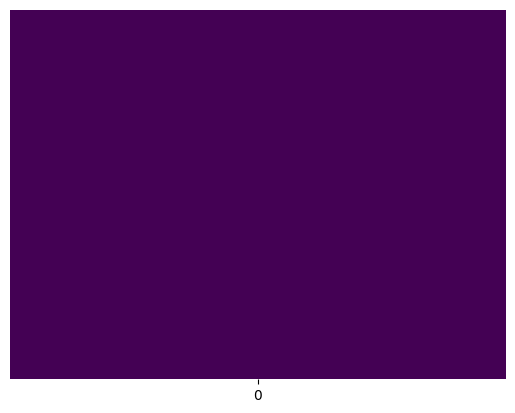

In [ ]:
import csv
df = pd.read_csv('/content/test-dataset.csv', header = None, delimiter="\t", quoting=csv.QUOTE_NONE, encoding='latin-1')
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [ ]:
df['class'].value_counts().plot( kind='bar', figsize=(5,5))

KeyError: ignored

In [ ]:
df.columns

Int64Index([0], dtype='int64')

In [ ]:
df.describe()

,0
count,1191
unique,1165
top,""""
freq,20


In [ ]:
df.isna().sum()

0    0
dtype: int64

In [ ]:
df.head(2)

,0
0,"Tweet,Class"
1,"""Haj told ideals and his mother and I don't kn..."


In [ ]:
df['class'].unique()

NameError: ignored

In [ ]:
stop_words_ = set(stopwords.words('english'))
wn = WordNetLemmatizer()
my_sw = ['make', 'amp',  'news','new' ,'time', 'u','s', 'photos',  'get', 'say']

def black_txt(token):
    return  token not in stop_words_ and token not in list(string.punctuation)  and len(token)>2 and token not in my_sw

def clean_txt(text):
    clean_text = []
    clean_text2 = []
    text = re.sub("'", "",text)
    text=re.sub("(\\d|\\W)+"," ",text)
    clean_text = [ wn.lemmatize(word, pos="v") for word in word_tokenize(text.lower()) if black_txt(word)]
    clean_text2 = [word for word in clean_text if black_txt(word)]
    return " ".join(clean_text2)

LookupError: ignored

In [ ]:
def subj_txt(text):
    return  TextBlob(text).sentiment[1]

def polarity_txt(text):
    return TextBlob(text).sentiment[0]

def len_text(text):
    if len(text.split())>0:
         return len(set(clean_txt(text).split()))/ len(text.split())
    else:
         return 0

In [ ]:
df['text'] = df['tweet']

df['text'] = df['tweet'].swifter.apply(clean_txt)
df['polarity'] = df['tweet'].swifter.apply(polarity_txt)
df['subjectivity'] = df['tweet'].swifter.apply(subj_txt)
df['len'] = df['tweet'].swifter.apply(lambda x: len(x))

NameError: ignored

In [ ]:
X = df[['text', 'polarity', 'subjectivity','len']]
y =df['class']

encoder = LabelEncoder()
y = encoder.fit_transform(y)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
v = dict(zip(list(y), df['Class'].to_list()))

NameError: ignored

In [ ]:
text_clf = Pipeline([
...     ('vect', CountVectorizer(analyzer="word", stop_words="english")),
...     ('tfidf', TfidfTransformer(use_idf=True)),
...     ('clf', MultinomialNB(alpha=.1)),
... ])

In [ ]:
text_clf.fit(x_train['text'].to_list(), list(y_train))

NameError: ignored

In [ ]:
import numpy as np

In [ ]:
X_TEST = x_test['text'].to_list()
Y_TEST = list(y_test)

NameError: ignored

In [ ]:
predicted = text_clf.predict(X_TEST)

NameError: ignored

In [ ]:
c = 0

for doc, Tweet in zip(X_TEST, predicted):

    if c == 2:break

    print("-"*55)
    print(doc)
    print(v[Tweet])
    print("-"*55)

    c = c + 1

NameError: ignored

In [ ]:
np.mean(predicted == Y_TEST)

NameError: ignored

In [ ]:
docs_new = ['Ten Months After George Floyd’s Death, Minneapolis Residents Are at War Over Policing']

In [ ]:
predicted = text_clf.predict(docs_new)

NotFittedError: ignored

In [ ]:
v[predicted[0]]

NameError: ignored

In [ ]:
import pickle
with open('model.pkl','wb') as f:
    pickle.dump(text_clf,f)

In [ ]:
# load
with open('model.pkl', 'rb') as f:
    clf2 = pickle.load(f)

In [ ]:
docs_new = ['my name is pranav']
predicted = clf2.predict(docs_new)

NotFittedError: ignored

In [ ]:
v[predicted[0]]

NameError: ignored